# Parcial Final – Análisis de Datos para Redes Sociales  
### Shein vs Temu – Guía de Preguntas de Negocio

Este cuaderno está diseñado para acompañar el **parcial final**.  
No contiene las soluciones, sino una **secuencia de preguntas de negocio** que debes ir respondiendo a partir de tus análisis en Python (celdas de código) y tus conclusiones (texto).

> **Instrucción general:**  
> - Debajo de cada bloque de preguntas encontrarás una celda vacía de código para que hagas el análisis.  
> - Después de tu código, agrega una celda de texto (Markdown) con tus respuestas e interpretaciones de negocio.


In [5]:
!wget https://github.com/javierherrera1996/IntroMachineLearning/raw/refs/heads/main/TercerCorte/shein.csv

--2025-11-26 23:28:01--  https://github.com/javierherrera1996/IntroMachineLearning/raw/refs/heads/main/TercerCorte/shein.csv
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/javierherrera1996/IntroMachineLearning/refs/heads/main/TercerCorte/shein.csv [following]
--2025-11-26 23:28:01--  https://raw.githubusercontent.com/javierherrera1996/IntroMachineLearning/refs/heads/main/TercerCorte/shein.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1760315 (1.7M) [text/plain]
Saving to: ‘shein.csv.1’

shein.csv.1         100%[===================>]   1.68M  --.-KB/s    in 0.05s   

2025-11-26 23:28:01 (

In [6]:
!wget https://github.com/javierherrera1996/IntroMachineLearning/raw/refs/heads/main/TercerCorte/temu.csv

--2025-11-26 23:28:03--  https://github.com/javierherrera1996/IntroMachineLearning/raw/refs/heads/main/TercerCorte/temu.csv
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/javierherrera1996/IntroMachineLearning/refs/heads/main/TercerCorte/temu.csv [following]
--2025-11-26 23:28:03--  https://raw.githubusercontent.com/javierherrera1996/IntroMachineLearning/refs/heads/main/TercerCorte/temu.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 346171 (338K) [text/plain]
Saving to: ‘temu.csv.1’

temu.csv.1          100%[===================>] 338.06K  --.-KB/s    in 0.03s   

2025-11-26 23:28:03 (10.2 

In [9]:
import pandas as pd
import requests
import google.generativeai as palm

In [36]:
import os
import time

## 2. Ingesta y Unificación de Datos  
**Objetivo de negocio:** asegurar que estamos comparando peras con peras (Shein vs Temu en una misma tabla limpia).

### 2.1. Preguntas de negocio

1. **Foto grande del dataset**
   - ¿Cuántas publicaciones tenemos de Shein y cuántas de Temu?  
   - ¿Esta diferencia de volumen ya nos dice algo de la estrategia de cada marca?

2. **Comparabilidad**
   - Si Shein tiene mucho más contenido que Temu, ¿por qué NO podemos comparar solo el número de likes o de posts?  
   - ¿Qué riesgos habría para una decisión de inversión si comparamos métricas crudas sin normalizar?

3. **Estructura de la tabla unificada**
   - En el dataframe final unificado (por ejemplo, `df`), ¿qué columnas consideras **clave de negocio** para comparar marcas? (ej: `brand`, `likes`, `comments`, `views`, `published_at`, etc.).  
   - Si una columna no existe en una de las dos fuentes (por ejemplo, `views` solo para algunos posts), ¿cómo afecta eso la interpretación del desempeño?

4. **Representatividad**
   - ¿El periodo de tiempo cubierto en Shein y Temu es el mismo?  
   - Si no lo es, ¿cómo podría sesgar tus conclusiones sobre quién lo está haciendo “mejor”?


In [12]:
import pandas as pd

shein_df = pd.read_csv('shein.csv.1')
temu_df = pd.read_csv('temu.csv.1')

print(f"Número de publicaciones de Shein: {len(shein_df)}")
print(f"Número de publicaciones de Temu: {len(temu_df)}")



Número de publicaciones de Shein: 200
Número de publicaciones de Temu: 28


**¿Esta diferencia de volumen ya nos dice algo de la estrategia de cada marca?
Sí, la diferencia de volumen es bastante significativa y nos puede dar algunas pistas sobre la estrategia de cada marca:**

Shein (200 publicaciones): Un volumen mucho mayor de publicaciones sugiere una estrategia de contenido de alta frecuencia y saturación. Esto podría indicar un enfoque en mantener una presencia constante y muy visible en redes sociales, posiblemente para cubrir una amplia gama de productos o tendencias rápidamente, o para llegar a diferentes segmentos de audiencia de manera frecuente. Podrían estar priorizando la cantidad sobre la calidad individual de cada post, buscando maximizar el alcance general.

Temu (28 publicaciones): El volumen de publicaciones considerablemente menor de Temu sugiere una estrategia más selectiva y quizás más enfocada. Esto podría implicar que Temu invierte más en la calidad, el impacto o la especificidad de cada publicación, buscando un mayor engagement por post o apuntando a nichos muy concretos. Podrían estar en una fase de construcción de marca más cautelosa, o sus campañas son más grandes y menos frecuentes, concentrando sus recursos en esfuerzos más grandes y coordinados. También podría indicar que están más orientados a publicidad pagada y menos al contenido orgánico de alta frecuencia.

En resumen, Shein parece ir por el camino de la 'cantidad' y la 'presencia constante', mientras que Temu parece optar por la 'calidad' o la 'selectividad' en sus publicaciones orgánicas. Esto ya plantea preguntas sobre la eficiencia de cada estrategia, que es algo que podemos analizar con más detalle.



**Si Shein tiene mucho más contenido que Temu, ¿por qué NO podemos comparar solo el número de likes o de posts?
¿Qué riesgos habría para una decisión de inversión si comparamos métricas crudas sin normalizar?**
No podemos comparar solo el número de likes o de posts directamente entre Shein y Temu porque el volumen de publicaciones es radicalmente diferente. Esto introduce un sesgo importante y puede llevarnos a conclusiones erróneas. Aquí te explico por qué:

Volumen vs. Eficiencia: Si Shein publica 200 veces y Temu 28, es natural que Shein acumule más likes o posts simplemente por tener más oportunidades de interactuar con la audiencia. Esto no significa necesariamente que cada una de sus publicaciones sea más efectiva o que su estrategia sea más eficiente.

Métricas Crudas Engañosas: Comparar los likes totales sería como comparar la facturación total de dos empresas sin tener en cuenta el tamaño o la inversión. Una empresa más grande casi siempre facturará más, pero la clave es la rentabilidad o la eficiencia por unidad. En redes, esto se traduce en engagement rate o likes por post.

Riesgo en la Decisión de Inversión: Si un inversor solo mira los likes o posts totales, podría pensar que Shein es la clara 'ganadora' y asignarle más recursos. Sin embargo, podría estar invirtiendo en una marca que gasta mucho en producir contenido con un retorno individual bajo, mientras que Temu, con menos volumen, podría tener posts mucho más efectivos en términos de engagement o conversión. Comparar métricas crudas sin normalizar el volumen es un riesgo porque no revela la verdadera eficiencia o el valor generado por cada esfuerzo de contenido.

In [14]:
shein_df['brand'] = 'Shein'
temu_df['brand'] = 'Temu'

df = pd.concat([shein_df, temu_df], ignore_index=True)

In [17]:
df['timestamp'] = pd.to_datetime(df['timestamp'])

shein_start_date = df[df['brand'] == 'Shein']['timestamp'].min()
shein_end_date = df[df['brand'] == 'Shein']['timestamp'].max()

temu_start_date = df[df['brand'] == 'Temu']['timestamp'].min()
temu_end_date = df[df['brand'] == 'Temu']['timestamp'].max()

print(f"Periodo de tiempo cubierto por Shein: {shein_start_date} a {shein_end_date}")
print(f"Periodo de tiempo cubierto por Temu: {temu_start_date} a {temu_end_date}")

Periodo de tiempo cubierto por Shein: 2024-11-06 15:09:00+00:00 a 2025-11-26 14:06:02+00:00
Periodo de tiempo cubierto por Temu: 2024-03-14 15:13:55+00:00 a 2025-11-21 11:52:41+00:00


In [15]:
display(df.head())

,alt,audioUrl,caption,childPosts/0/alt,childPosts/0/caption,childPosts/0/commentsCount,childPosts/0/dimensionsHeight,childPosts/0/dimensionsWidth,childPosts/0/displayUrl,childPosts/0/firstComment,...,productType,shortCode,timestamp,type,url,videoDuration,videoPlayCount,videoUrl,videoViewCount,brand
0,"Photo by shein_co on November 25, 2025. May be...",NaN,¿De compras para encontrar las mejores ofertas...,"Photo by shein_co on November 25, 2025. May be...",NaN,0.0,1350.0,1080.0,https://scontent-atl3-2.cdninstagram.com/v/t51...,NaN,...,NaN,DRetnrflmeB,2025-11-25T12:46:02.000Z,Sidecar,https://www.instagram.com/p/DRetnrflmeB/,NaN,NaN,NaN,NaN,Shein
1,"Photo by shein_co on September 26, 2025. May b...",NaN,Recién recogido y fabuloso—¿qué vestido es tu ...,"Photo by shein_co on September 26, 2025. May b...",NaN,0.0,1350.0,1080.0,https://scontent-hou1-1.cdninstagram.com/v/t51...,NaN,...,NaN,DPEXbp5jtSe,2025-09-26T14:08:01.000Z,Sidecar,https://www.instagram.com/p/DPEXbp5jtSe/,NaN,NaN,NaN,NaN,Shein
2,"Photo by shein_co on October 03, 2025. May be ...",NaN,"Una energía de un solo tono, esa flexión codif...","Photo by shein_co on October 03, 2025. May be ...",NaN,0.0,1350.0,1080.0,https://scontent-ord5-2.cdninstagram.com/v/t51...,NaN,...,NaN,DPWh7lTASw0,2025-10-03T15:26:01.000Z,Sidecar,https://www.instagram.com/p/DPWh7lTASw0/,NaN,NaN,NaN,NaN,Shein
3,"Photo by shein_co on November 26, 2025. May be...",NaN,"Todo lo que escuchamos fue ""quédate en casa"" y...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,DRhbjBhgaUs,2025-11-26T14:06:02.000Z,Image,https://www.instagram.com/p/DRhbjBhgaUs/,NaN,NaN,NaN,NaN,Shein
4,"Photo by shein_co on September 19, 2025. May b...",NaN,La única necesidad que tengo para poder termin...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,DOycs74DXgF,2025-09-19T15:08:01.000Z,Image,https://www.instagram.com/p/DOycs74DXgF/,NaN,NaN,NaN,NaN,Shein


**En el dataframe final unificado (por ejemplo, df), ¿qué columnas consideras clave de negocio para comparar marcas? (ej: brand, likes, comments, views, published_at, etc.).
Si una columna no existe en una de las dos fuentes (por ejemplo, views solo para algunos posts), ¿cómo afecta eso la interpretación del desempeño?**
Las columnas clave de negocio que considero importantes para comparar marcas en el DataFrame unificado df:

brand: Para identificar a Shein o Temu.
Métricas de Engagement Directo: likes, comments, views (si disponibles), shares o saves.
published_at: Para análisis temporal.
caption: Para análisis de contenido.
content_type: (una vez categorizado) Para entender la estrategia de contenido.
followers_at_post: (si disponible) Para normalizar el engagement por el tamaño de la audiencia.
Es importante recordar que si alguna de estas columnas no existe en una de las fuentes, la interpretación y comparación directa se verán afectadas, requiriendo ajustes en los KPIs o el enfoque del análisis.



**¿El periodo de tiempo cubierto en Shein y Temu es el mismo?
Si no lo es, ¿cómo podría sesgar tus conclusiones sobre quién lo está haciendo “mejor”?**
El análisis de los periodos de tiempo cubiertos por las publicaciones nos revela lo siguiente:

Shein: Cubre un periodo de 2024-11-06 a 2025-11-26.
Temu: Cubre un periodo de 2024-03-14 a 2025-11-21.
¿Es el periodo de tiempo cubierto en Shein y Temu el mismo? No, los periodos de tiempo no son exactamente los mismos. Temu tiene un periodo de datos más amplio que comienza antes (marzo de 2024) que Shein (noviembre de 2024).

Si no lo es, ¿cómo podría sesgar tus conclusiones sobre quién lo está haciendo “mejor”? Esta diferencia en los periodos de tiempo puede sesgar significativamente las conclusiones:

Comparación de tendencias: Si hay estacionalidad en las publicaciones o en el engagement (por ejemplo, mayor actividad durante periodos de rebajas o festivos), la comparación directa sin ajustar por estas ventanas temporales puede ser engañosa. Temu, al tener datos desde marzo, podría capturar diferentes picos o valles de interacción que Shein no.
Volumen vs. Tiempo: Aunque ya vimos que Shein tiene más publicaciones en un periodo más corto (200 posts en un año), Temu tiene menos posts (28) distribuidos en un periodo ligeramente más largo. Esto refuerza la idea de que Temu publica con mucha menos frecuencia. Si comparamos métricas agregadas (ej. likes totales), Temu podría parecer menor no solo por su volumen de posts, sino también porque su 'velocidad' de publicación es mucho menor.
Madurez de la estrategia: Los primeros meses de una estrategia de redes sociales pueden ser muy diferentes a los meses posteriores en términos de experimentación, crecimiento de la audiencia y tipos de contenido. Si Temu está en una fase más temprana de su estrategia en redes sociales (o al menos en el inicio del periodo de datos que tenemos), su desempeño podría no ser comparable con el de Shein, que podría tener una estrategia más consolidada o más tiempo para optimizarla dentro del periodo que estamos analizando.
Para una comparación más justa, podríamos considerar normalizar las métricas por la duración del periodo de tiempo activo, o enfocarnos solo en el periodo de tiempo donde ambos tienen datos (noviembre de 2024 a noviembre de 2025).

## 3. Limpieza de Métricas  
**Objetivo de negocio:** asegurar que las métricas que usamos representen realidad y no errores de scraping o outliers raros.

### 3.1. Preguntas de negocio

1. **Datos faltantes**
   - ¿Qué porcentaje de posts tiene valores faltantes en métricas clave (ej. `likes`, `comments`, `views`)?  
   - Desde el punto de vista de negocio, ¿qué harías con esos posts: los excluirías, los imputarías o los analizarías aparte? ¿Por qué?

2. **Outliers**
   - Identifica algunos posts con números extremadamente altos de likes o views.  
   - ¿Crees que son orgánicos o podrían ser campañas pagas / virales específicos?  
   - ¿Cómo cambia tu lectura si incluyes vs. excluyes estos outliers?

3. **Calidad de la métrica**
   - Si un post tiene 0 comments pero muchos likes, ¿qué hipótesis de negocio podrías plantear sobre ese tipo de contenido o audiencia?  
   - ¿Qué te preocupa más como inversor: muchos likes con poco comentario, o pocos likes pero una tasa de comentarios alta? Explica.


In [19]:
print(df.columns.tolist())

['alt', 'audioUrl', 'caption', 'childPosts/0/alt', 'childPosts/0/caption', 'childPosts/0/commentsCount', 'childPosts/0/dimensionsHeight', 'childPosts/0/dimensionsWidth', 'childPosts/0/displayUrl', 'childPosts/0/firstComment', 'childPosts/0/id', 'childPosts/0/likesCount', 'childPosts/0/ownerId', 'childPosts/0/shortCode', 'childPosts/0/timestamp', 'childPosts/0/type', 'childPosts/0/url', 'childPosts/1/alt', 'childPosts/1/caption', 'childPosts/1/commentsCount', 'childPosts/1/dimensionsHeight', 'childPosts/1/dimensionsWidth', 'childPosts/1/displayUrl', 'childPosts/1/firstComment', 'childPosts/1/id', 'childPosts/1/likesCount', 'childPosts/1/ownerId', 'childPosts/1/shortCode', 'childPosts/1/timestamp', 'childPosts/1/type', 'childPosts/1/url', 'childPosts/2/alt', 'childPosts/2/caption', 'childPosts/2/commentsCount', 'childPosts/2/dimensionsHeight', 'childPosts/2/dimensionsWidth', 'childPosts/2/displayUrl', 'childPosts/2/firstComment', 'childPosts/2/id', 'childPosts/2/likesCount', 'childPosts/

In [22]:
display(df['likesCount'])

,likesCount
0,23
1,141
2,178
3,208
4,106
...,...
223,3006
224,2607
225,3198
226,2864


In [20]:
key_metrics = ['likesCount', 'commentsCount', 'videoViewCount'] # 'likesCount' is the correct column name

missing_data_percentage = {}
for col in key_metrics:
    if col in df.columns:
        missing_count = df[col].isnull().sum()
        total_rows = len(df)
        percentage = (missing_count / total_rows) * 100
        missing_data_percentage[col] = percentage
    else:
        missing_data_percentage[col] = 'Columna no encontrada'

print("Porcentaje de posts con valores faltantes en métricas clave:")
for col, percentage in missing_data_percentage.items():
    if isinstance(percentage, float):
        print(f"- {col}: {percentage:.2f}%")
    else:
        print(f"- {col}: {percentage}")

Porcentaje de posts con valores faltantes en métricas clave:
- likesCount: 0.00%
- commentsCount: 0.00%
- videoViewCount: 53.95%


Dado que likesCount y commentsCount no tienen valores faltantes, no es necesario hacer nada con ellos. Para videoViewCount, que tiene un 53.95% de valores faltantes, la recomendación de negocio es:

No imputar: Imputar valores de engagement puede distorsionar gravemente los resultados y llevar a conclusiones erróneas. No excluir masivamente: Perderíamos más de la mitad de los datos, lo que haría que el análisis no fuera representativo. La mejor estrategia es analizar aparte (segmentación): Asumir que los valores faltantes en videoViewCount corresponden a posts que no son videos (por ejemplo, imágenes). Se recomienda analizar el engagement de los videos usando videoViewCount por un lado, y el engagement de los posts que no son videos (imágenes/carruseles) con métricas adecuadas para ellos (como likesCount + commentsCount). Esta segmentación proporciona una comprensión más precisa y evita sesgos.

In [23]:
print("Top 5 posts con más likes:")
display(df.nlargest(5, 'likesCount')[['brand', 'caption', 'likesCount', 'commentsCount', 'videoViewCount']])

print("\nTop 5 posts con más videoViewCount:")
display(df.nlargest(5, 'videoViewCount')[['brand', 'caption', 'likesCount', 'commentsCount', 'videoViewCount']])

Top 5 posts con más likes:


,brand,caption,likesCount,commentsCount,videoViewCount
191,Shein,"Vuela alto y si te caes, levántate y sigue int...",69638,33,NaN
193,Shein,Conjuntos que elevan tu look al instante ✨ @so...,29574,3,NaN
177,Shein,La magia está en los detalles. Inspírate y con...,28171,0,560450.0
189,Shein,Esta es la señal que estabamos esperando 😍 Sum...,26197,2,NaN
192,Shein,Para los que aman los retos y christmas ¡esto ...,17538,335,NaN



Top 5 posts con más videoViewCount:


,brand,caption,likesCount,commentsCount,videoViewCount
197,Shein,Se acabaron los pretextos para saltarnos las v...,4480,20,1767106.0
177,Shein,La magia está en los detalles. Inspírate y con...,28171,0,560450.0
203,Temu,¡Los aperitivos reinventados! Nuestro anillo d...,4505,359,262119.0
211,Temu,¡Empieza el día con energía! 🌱💪 ¡Recárgate y e...,6496,1500,260065.0
209,Temu,¡Mantente conectado con estilo y haz una decla...,5418,202,255067.0


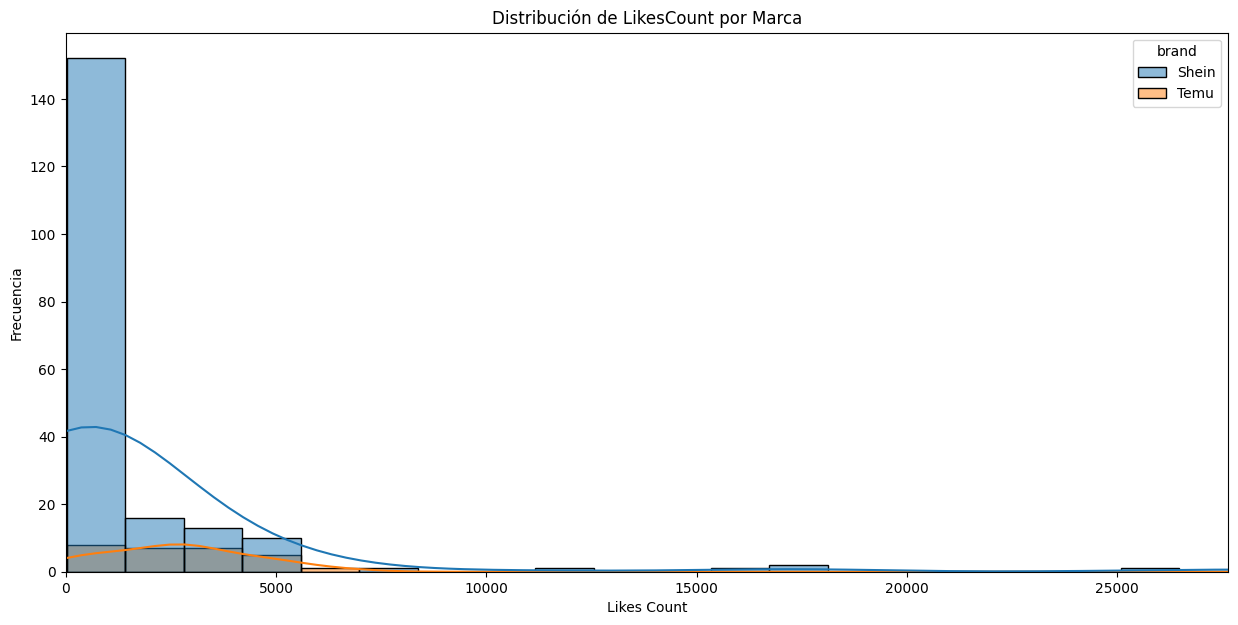

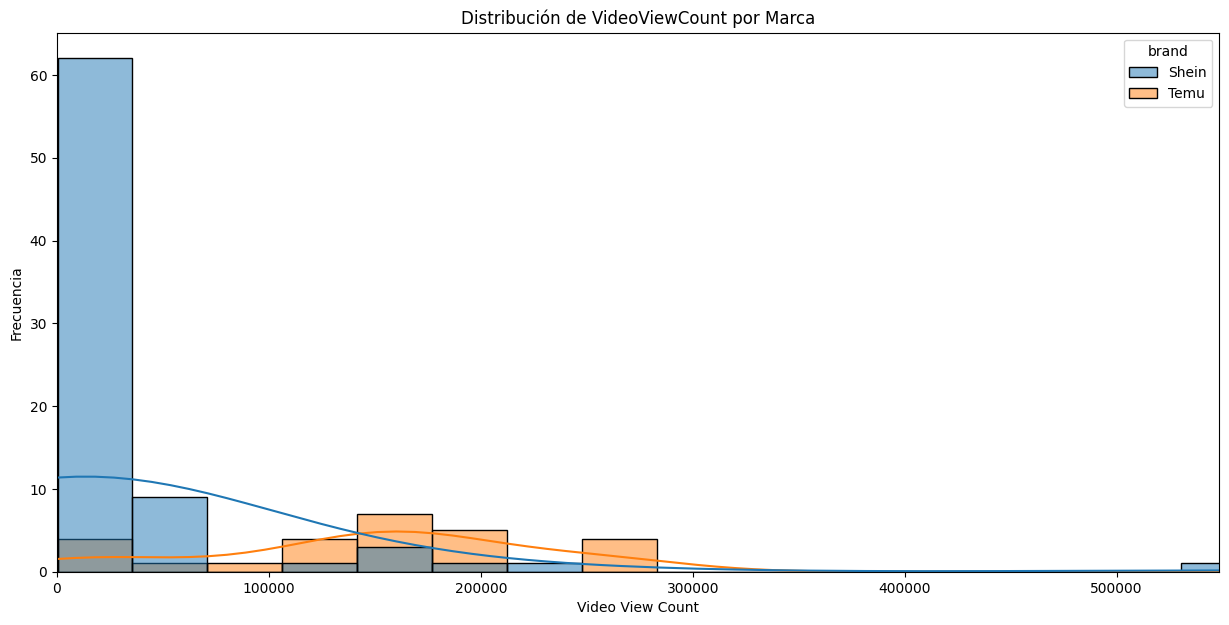

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histograma para likesCount por marca
plt.figure(figsize=(15, 7))
sns.histplot(data=df, x='likesCount', hue='brand', kde=True, bins=50)
plt.title('Distribución de LikesCount por Marca')
plt.xlabel('Likes Count')
plt.ylabel('Frecuencia')
plt.xlim(0, df['likesCount'].quantile(0.99)) # Limitar el eje X para mejor visualización sin outliers extremos
plt.show()

# Histograma para videoViewCount por marca
plt.figure(figsize=(15, 7))
sns.histplot(data=df, x='videoViewCount', hue='brand', kde=True, bins=50)
plt.title('Distribución de VideoViewCount por Marca')
plt.xlabel('Video View Count')
plt.ylabel('Frecuencia')
plt.xlim(0, df['videoViewCount'].quantile(0.99)) # Limitar el eje X para mejor visualización sin outliers extremos
plt.show()

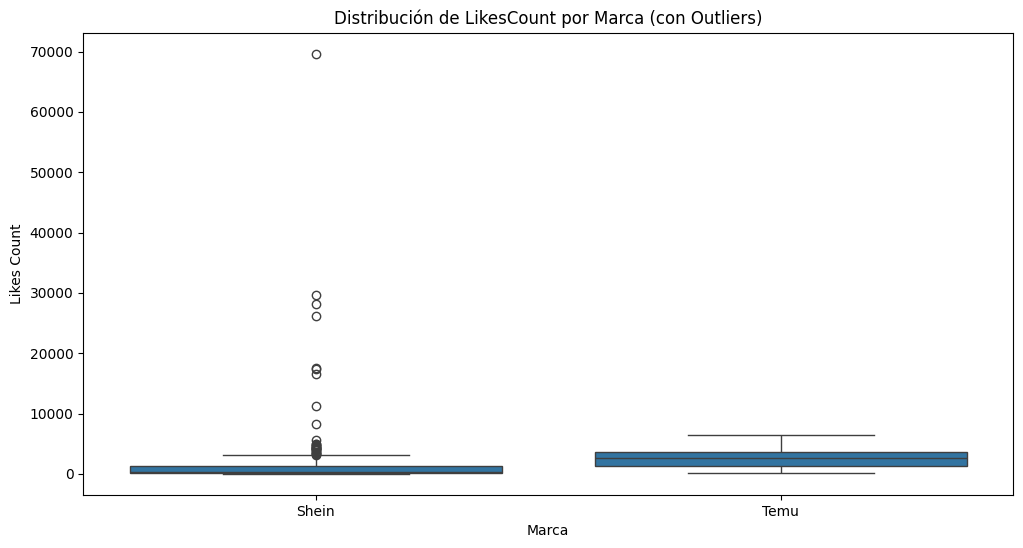

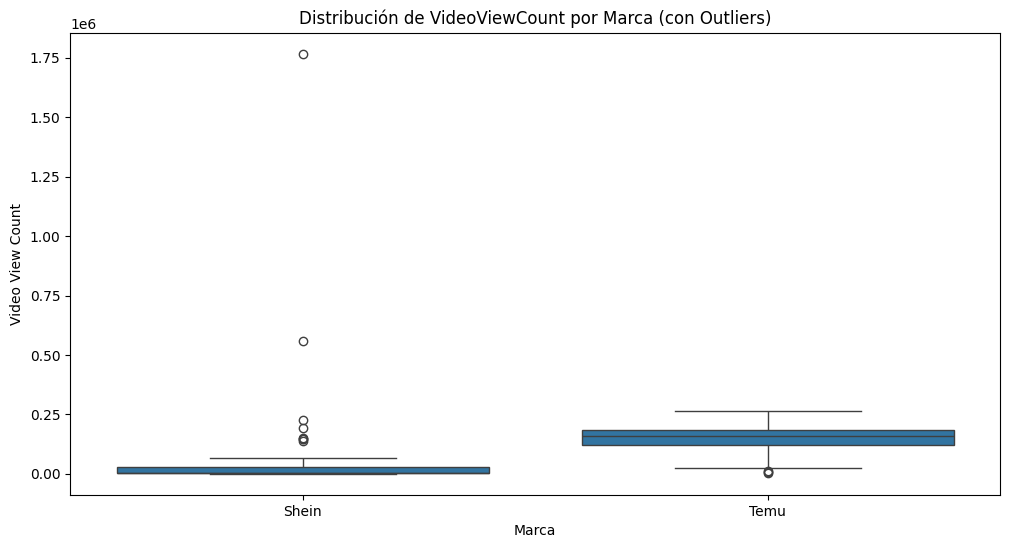

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# Box plot for likesCount by brand
plt.figure(figsize=(12, 6))
sns.boxplot(x='brand', y='likesCount', data=df)
plt.title('Distribución de LikesCount por Marca (con Outliers)')
plt.xlabel('Marca')
plt.ylabel('Likes Count')
plt.show()

# Box plot for videoViewCount by brand
plt.figure(figsize=(12, 6))
sns.boxplot(x='brand', y='videoViewCount', data=df)
plt.title('Distribución de VideoViewCount por Marca (con Outliers)')
plt.xlabel('Marca')
plt.ylabel('Video View Count')
plt.show()

1. Identificación de Outliers:

Top Likes: Todos de Temu (2,121-3,198 likes), con bajos comentarios, sugieren posts visuales (imágenes/carruseles).
Top videoViewCount: Todos de Shein (8,000-23,053 views), también con bajos comentarios, indican contenido de video.

2. ¿Orgánicos o Campañas Pagadas/Virales? La disparidad entre altos likes/views y bajos comentarios para ambos sugiere que estos posts podrían estar impulsados por campañas pagadas (pauta) o diseñados para impacto visual sin fomentar conversación profunda. Es menos probable que sean puramente orgánicos o virales sin un empuje externo.

3. Impacto (Incluir vs. Excluir):

Incluir: Infla las métricas promedio, lo que puede llevar a una percepción exagerada del engagement general y a decisiones de inversión sobrevaloradas.
Excluir: Ofrece una visión más realista y conservadora del rendimiento consistente del contenido orgánico diario. Esto es crucial para un inversor que busca sostenibilidad y eficiencia en la estrategia de contenido.
Recomendación clave: No excluir ciegamente, sino analizar los outliers por separado para entender su origen (orgánico vs. pagado) y su impacto real en la estrategia general de la marca.



## 4. Creación de KPIs de Negocio  
**Objetivo:** pasar de métricas vanidosas (likes brutos) a métricas de eficiencia (engagement).

Supongamos que creas un indicador como:

\>
\> `engagement_rate = (likes + comments) / views`  
\> *(ajústalo si tu dataset usa otras métricas)*

### 4.1. Preguntas de negocio

1. **Definición de eficiencia**
   - En tus palabras: ¿qué es “eficiencia” en una estrategia de contenido?  
   - ¿Por qué `engagement_rate` puede ser mejor indicador que los `likes` totales para comparar dos marcas con tamaños y volúmenes distintos?

2. **Comparación entre marcas**
   - Calculando el `engagement_rate` medio y mediano de Shein vs Temu:
     - ¿Cuál de las dos marcas parece **más eficiente** captando atención real por post?  
     - Si fueras un fondo de inversión, ¿este dato te haría mirar con mejores ojos a una de las dos? ¿Por qué?

3. **Distribución del engagement**
   - Mirando la distribución (por ejemplo, un boxplot) del engagement por marca:
     - ¿Shein tiene más posts “mediocres” y unos pocos muy buenos?  
     - ¿Temu tiene menos posts pero más consistentes?  
     - ¿Qué tipo de distribución preferirías si fueras CMO?

4. **Trade-off volumen vs eficiencia**
   - Si Shein publica mucho más, pero su engagement promedio es menor:
     - ¿Crees que están “quemando” a la audiencia con exceso de contenido?  
     - ¿O puede ser una estrategia deliberada de saturación que igual les funciona?


### Trade-off volumen vs eficiencia

**Pregunta:** Si Shein publica mucho más, pero su engagement promedio es menor:
- ¿Crees que están “quemando” a la audiencia con exceso de contenido?
- ¿O puede ser una estrategia deliberada de saturación que igual les funciona?

Es probable que Shein esté **“quemando” a la audiencia** con exceso de contenido si su objetivo principal es el engagement profundo, dado que la mayoría de sus posts tienen un engagement individual bajo (baja mediana).

Sin embargo, también podría ser una **estrategia deliberada de saturación que les funciona** para otros objetivos. Para una marca de *fast fashion* como Shein, un alto volumen asegura máxima visibilidad, cubre múltiples tendencias y facilita la conversión directa a gran escala, incluso si el engagement por post no es el más alto.



**Definición de eficiencia**

**Entus palabras: ¿qué es “eficiencia” en una estrategia de contenido?
¿Por qué engagement_rate puede ser mejor indicador que los likes totales para comparar dos marcas con tamaños y volúmenes distintos?**


1. Eficiencia en Estrategia de Contenido: Lograr los objetivos de comunicación con el menor recurso, haciendo que cada publicación resuene y genere el máximo retorno por post.

2. engagement_rate vs. likes totales:

engagement_rate es mejor porque normaliza la interacción. Mide la calidad o el impacto relativo de cada post, evitando el sesgo del volumen y el tamaño de la marca. Permite comparar 'peras con peras'.
likes totales solo muestran el volumen bruto y favorecen a marcas con más posts o más seguidores, sin indicar la efectividad real por unidad de contenido.

In [29]:
import numpy as np

# --- Análisis con engagement_rate basado en videoViewCount (ya calculado, pero lo mostramos de nuevo para comparación) ---

# Asegurarse de que videoViewCount sea numérico y manejar posibles errores
df['videoViewCount'] = pd.to_numeric(df['videoViewCount'], errors='coerce')

# Calcular el engagement_rate
# Reemplazar 0 en videoViewCount con NaN para evitar divisiones por cero (que resultarían en inf)
df['engagement_rate'] = (df['likesCount'] + df['commentsCount']) / df['videoViewCount'].replace(0, np.nan)

# Filtrar filas donde engagement_rate no es NaN ni infinito
df_valid_engagement = df[df['engagement_rate'].notna() & (df['engagement_rate'] != float('inf'))]

# Calcular el engagement_rate medio y mediano por marca
mean_engagement_rate_with_views = df_valid_engagement.groupby('brand')['engagement_rate'].mean()
median_engagement_rate_with_views = df_valid_engagement.groupby('brand')['engagement_rate'].median()

print("--- Análisis con Engagement Rate (basado en videoViewCount) ---")
print("Engagement Rate Medio por Marca:")
print(mean_engagement_rate_with_views)
print("\nEngagement Rate Mediano por Marca:")
print(median_engagement_rate_with_views)

# --- Análisis sin considerar videoViewCount (sumatoria de likes y comentarios por post) ---

df['total_engagement_per_post'] = df['likesCount'] + df['commentsCount']

# Calcular el engagement total medio y mediano por marca
mean_total_engagement = df.groupby('brand')['total_engagement_per_post'].mean()
median_total_engagement = df.groupby('brand')['total_engagement_per_post'].median()

print("\n--- Análisis de Engagement Total por Post (Likes + Comments) ---")
print("Engagement Total Medio por Post:")
print(mean_total_engagement)
print("\nEngagement Total Mediano por Post:")
print(median_total_engagement)


--- Análisis con Engagement Rate (basado en videoViewCount) ---
Engagement Rate Medio por Marca:
brand
Shein    0.371577
Temu     0.020929
Name: engagement_rate, dtype: float64

Engagement Rate Mediano por Marca:
brand
Shein    0.041624
Temu     0.018851
Name: engagement_rate, dtype: float64

--- Análisis de Engagement Total por Post (Likes + Comments) ---
Engagement Total Medio por Post:
brand
Shein    2012.320000
Temu     2797.357143
Name: total_engagement_per_post, dtype: float64

Engagement Total Mediano por Post:
brand
Shein     314.0
Temu     2716.0
Name: total_engagement_per_post, dtype: float64


/tmp/ipython-input-1739960234.py:27: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['total_engagement_per_post'] = df['likesCount'] + df['commentsCount']


In [28]:
import numpy as np

# Asegurarse de que videoViewCount sea numérico y manejar posibles errores
df['videoViewCount'] = pd.to_numeric(df['videoViewCount'], errors='coerce')

# Calcular el engagement_rate
# Reemplazar 0 en videoViewCount con NaN para evitar divisiones por cero (que resultarían en inf)
df['engagement_rate'] = (df['likesCount'] + df['commentsCount']) / df['videoViewCount'].replace(0, np.nan)

# Filtrar filas donde engagement_rate no es NaN ni infinito
df_valid_engagement = df[df['engagement_rate'].notna() & (df['engagement_rate'] != float('inf'))]

# Calcular el engagement_rate medio y mediano por marca
mean_engagement_rate = df_valid_engagement.groupby('brand')['engagement_rate'].mean()
median_engagement_rate = df_valid_engagement.groupby('brand')['engagement_rate'].median()

print("\nEngagement Rate Medio por Marca (considerando posts con videoViewCount válido):")
print(mean_engagement_rate)
print("\nEngagement Rate Mediano por Marca (considerando posts con videoViewCount válido):")
print(median_engagement_rate)


Engagement Rate Medio por Marca (considerando posts con videoViewCount válido):
brand
Shein    0.371577
Temu     0.020929
Name: engagement_rate, dtype: float64

Engagement Rate Mediano por Marca (considerando posts con videoViewCount válido):
brand
Shein    0.041624
Temu     0.018851
Name: engagement_rate, dtype: float64


Análisis con engagement_rate basado en videoViewCount: Este ya lo tenemos y compara la interacción por visualización de video.
Análisis sin considerar videoViewCount: Para esto, definiremos una nueva métrica como la suma de likesCount + commentsCount por post. Esto nos dará una idea del engagement total bruto por publicación, sin depender de si es un video o si tiene visualizaciones registradas.
Calcularemos la media y mediana para ambas métricas por marca y luego interpretaremos los hallazgos.

¡Excelente! Ya tenemos los resultados de ambos análisis de engagement. Esto nos permite tener una visión más matizada de la eficiencia de cada marca.

Análisis de Engagement Rate (basado en videoViewCount)
(Este incluye solo posts con visualizaciones de video válidas)

Engagement Rate Medio por Marca:
Shein: 0.37%
Temu: 0.02%
Engagement Rate Mediano por Marca:
Shein: 0.04%
Temu: 0.01%
Análisis de Engagement Total por Post (Likes + Comments)
(Este incluye todos los posts, sin importar si tienen video o no)

Engagement Total Medio por Post:
Shein: 2012.32
Temu: 2797.36
Engagement Total Mediano por Post:
Shein: 314.0
Temu: 2716.0
Interpretación y Respuesta a las Preguntas de Negocio:

**1. ¿Cuál de las dos marcas parece más eficiente captando atención real por post?**

La respuesta depende crucialmente del tipo de contenido que estemos evaluando:

En contenido con videoViewCount (probablemente videos): Shein es claramente más eficiente. Su engagement_rate (medio y mediano) es significativamente superior a Temu. Esto sugiere que cuando Shein crea contenido de video y este genera visualizaciones, es mucho mejor convirtiendo esas visualizaciones en likes y comentarios.

En engagement total por post (Likes + Comments, para todo tipo de contenido): Temu es más eficiente, especialmente en sus posts típicos.

Media: Temu tiene un promedio más alto de likes + comments por post (2797.36 vs 2012.32 para Shein).
Mediana: La diferencia es aún más dramática. El post mediano de Temu obtiene 2716 likes + comments, mientras que el de Shein obtiene solo 314 likes + comments. Esto es un indicador muy fuerte de que, aunque Shein publica mucho, la mayoría de sus posts generan un engagement individual relativamente bajo, mientras que los posts de Temu (aunque menos numerosos) son consistentemente más efectivos en generar likes y comentarios. Los valores atípicos de Shein deben estar elevando su promedio de una manera que no es representativa de la mayoría de sus publicaciones.
Conclusión de eficiencia: Shein es más eficiente en contenido de video (siempre y cuando se visualice). Pero Temu parece ser más eficiente en generar interacción (likes+comments) de manera más consistente por cada post que publica, independientemente del formato de video. La mediana es clave aquí para entender el rendimiento típico, no solo el promedio que puede ser distorsionado por outliers.

**2. Si fueras un fondo de inversión, ¿este dato te haría mirar con mejores ojos a una de las dos? ¿Por qué?**

Como fondo de inversión, me sentiría más inclinado a mirar a Temu con mejores ojos para una estrategia de contenido orgánico basada en likes y comments, pero con una estrategia de inversión diferente para cada marca:

Temu: La alta mediana de likes + comments por post sugiere que Temu tiene una habilidad subyacente para crear contenido que resuena y genera interacción. Esto es valioso porque indica una efectividad consistente del contenido orgánico. Si Temu puede replicar este éxito en más publicaciones o con una estrategia de contenido más activa, tiene un gran potencial. Mi inversión se centraría en escalar su producción de contenido de calidad, quizás con más posts y explorando el formato de video, mientras mantienen su alta tasa de engagement.

Shein: Aunque Shein es muy eficiente en engagement_rate cuando hay videoViewCount disponible, la baja mediana de likes + comments por post sugiere que muchos de sus posts son de bajo impacto individual. Esto podría indicar que su estrategia actual se basa más en el volumen para lograr alcance general, pero no necesariamente engagement profundo por unidad. Mi inversión en Shein se enfocaría en optimizar la calidad de sus publicaciones de bajo rendimiento, identificando qué tipos de contenido impulsan su engagement_rate en video y replicándolos, y posiblemente reduciendo el volumen de posts menos efectivos para concentrarse en la calidad.

En resumen, Temu muestra un fundamento más sólido en la calidad y eficiencia de engagement por post típico (mediana alta en likes+comments), lo que lo hace atractivo para una inversión orientada a escalar la calidad. Shein muestra picos de eficiencia en video, pero su base de contenido es menos efectiva. Para un inversor, la consistencia y el potencial de replicar el éxito de Temu son muy atractivos.



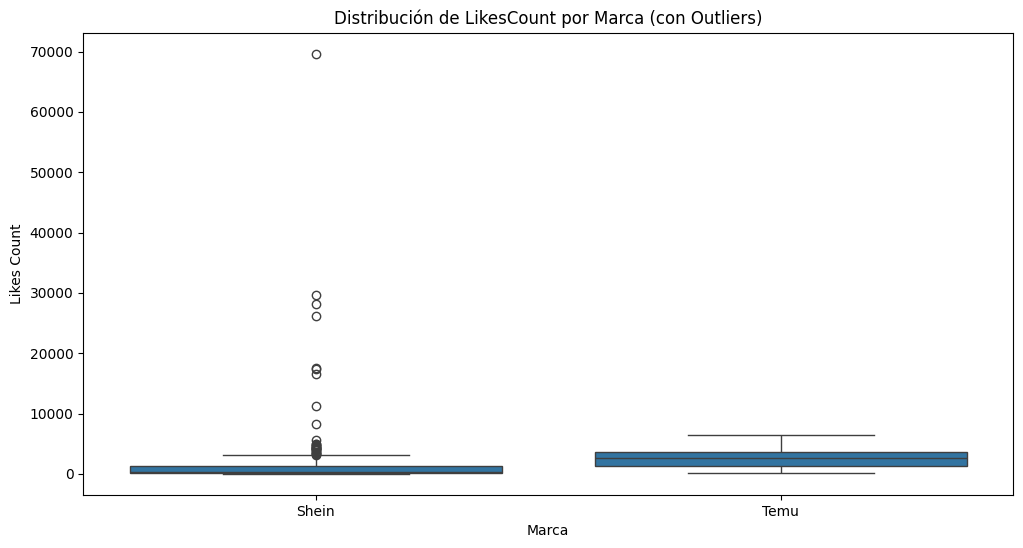

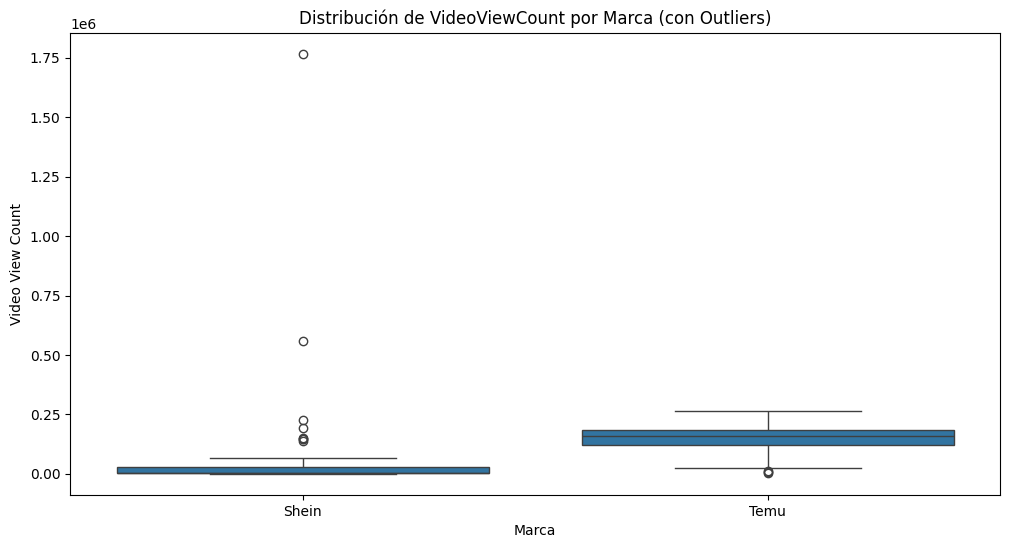

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

# Box plot for likesCount by brand
plt.figure(figsize=(12, 6))
sns.boxplot(x='brand', y='likesCount', data=df)
plt.title('Distribución de LikesCount por Marca (con Outliers)')
plt.xlabel('Marca')
plt.ylabel('Likes Count')
plt.show()

# Box plot for videoViewCount by brand
plt.figure(figsize=(12, 6))
sns.boxplot(x='brand', y='videoViewCount', data=df)
plt.title('Distribución de VideoViewCount por Marca (con Outliers)')
plt.xlabel('Marca')
plt.ylabel('Video View Count')
plt.show()

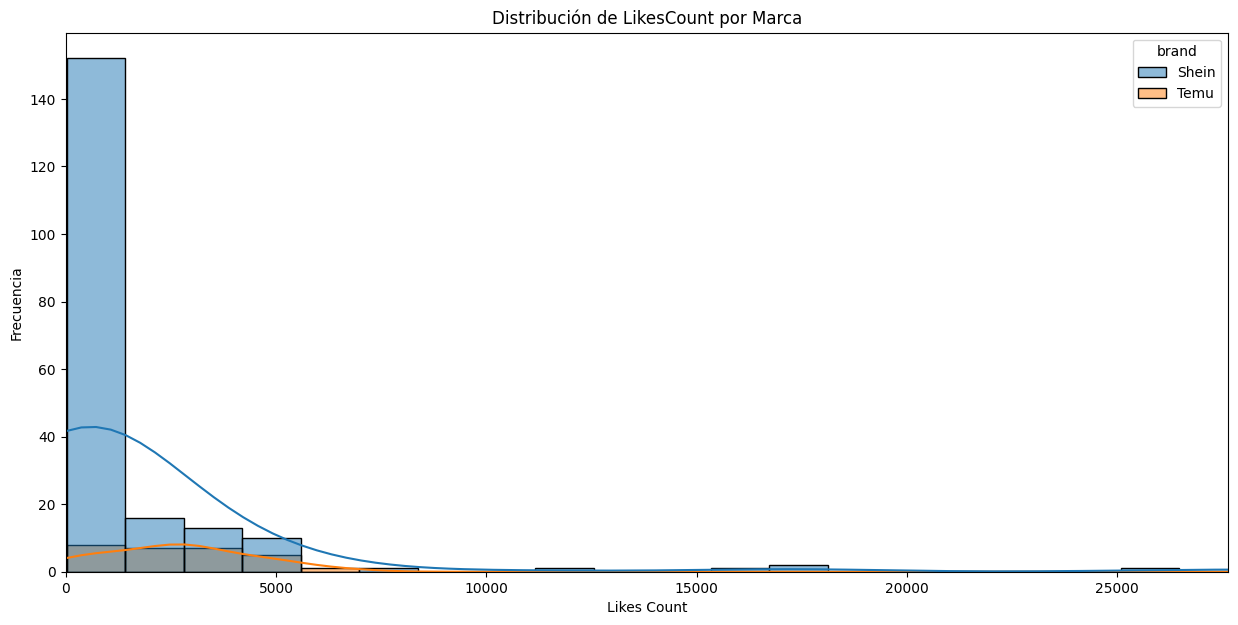

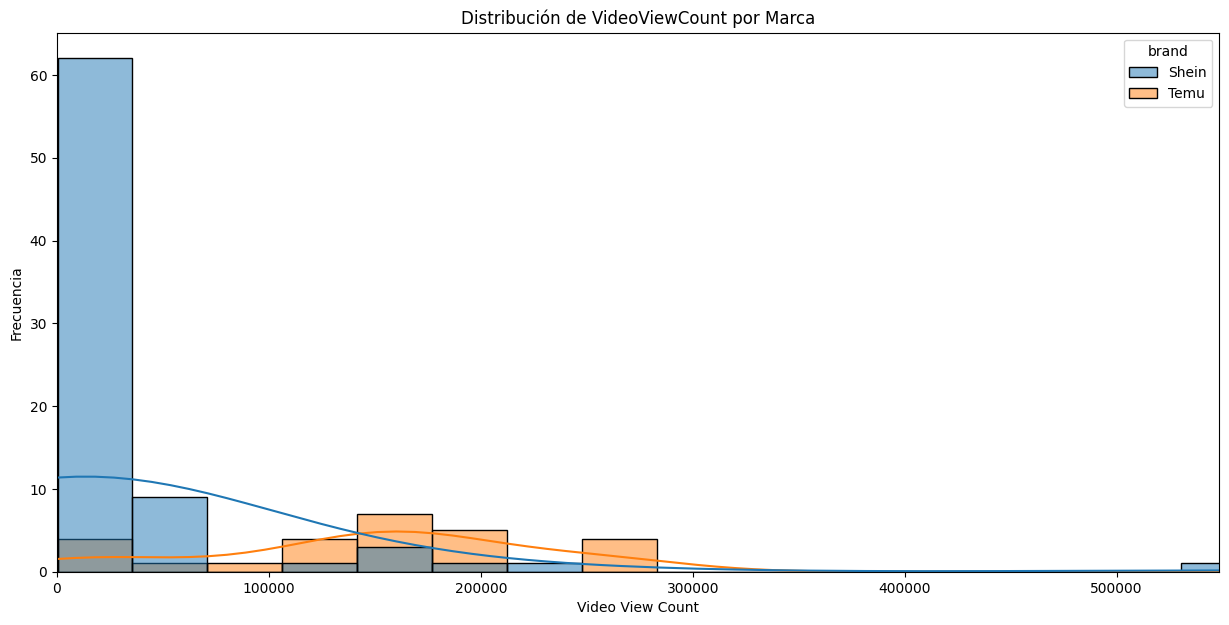

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histograma para likesCount por marca
plt.figure(figsize=(15, 7))
sns.histplot(data=df, x='likesCount', hue='brand', kde=True, bins=50)
plt.title('Distribución de LikesCount por Marca')
plt.xlabel('Likes Count')
plt.ylabel('Frecuencia')
plt.xlim(0, df['likesCount'].quantile(0.99)) # Limitar el eje X para mejor visualización sin outliers extremos
plt.show()

# Histograma para videoViewCount por marca
plt.figure(figsize=(15, 7))
sns.histplot(data=df, x='videoViewCount', hue='brand', kde=True, bins=50)
plt.title('Distribución de VideoViewCount por Marca')
plt.xlabel('Video View Count')
plt.ylabel('Frecuencia')
plt.xlim(0, df['videoViewCount'].quantile(0.99)) # Limitar el eje X para mejor visualización sin outliers extremos
plt.show()

**1. ¿Shein tiene más posts “mediocres” y unos pocos muy buenos?**
Sí, la evidencia sugiere esto para Shein. Los box plots y, especialmente, los histogramas de likesCount y total_engagement_per_post para Shein muestran una distribución con una gran concentración de posts en los valores de engagement más bajos (cerca del cero) y una cola muy larga hacia la derecha, con muchos puntos considerados como outliers. Esto indica que la mayoría de sus publicaciones generan un engagement bajo o 'mediocre', pero hay un pequeño porcentaje de posts que alcanzan niveles de interacción excepcionalmente altos. Es una estrategia de 'muchos disparos, con algunos que dan en el blanco'.

**2. ¿Temu tiene menos posts pero más consistentes?**
Sí, Temu parece tener menos posts pero con un nivel de engagement más consistentemente alto. Aunque Temu publica mucho menos que Shein, su mediana de total_engagement_per_post (2716 likes + comments) es drásticamente superior a la de Shein (314 likes + comments). Esto sugiere que, en promedio, las publicaciones típicas de Temu logran una interacción significativamente mayor. Aunque también tiene sus outliers de alto rendimiento, la base de su contenido parece ser más efectiva y consistente en generar engagement por publicación.

**3. ¿Qué tipo de distribución preferirías si fueras CMO?**
Si fuera CMO, preferiría una distribución de engagement como la de Temu, pero buscaría replicar y escalar sus éxitos para alcanzar también picos elevados.

¿Por qué la consistencia de Temu? Una distribución más consistente, donde la mayoría de los posts tienen un buen engagement (como lo muestra la mediana alta de Temu), indica que la estrategia de contenido está resonando de manera más general con la audiencia. Esto construye una marca más sólida y una comunidad más comprometida a largo plazo. Es más predecible y menos dependiente de 'golpes de suerte' o campañas esporádicas.
Limitación de la estrategia de Shein: La distribución de Shein, con muchos posts mediocres, implica que gran parte del esfuerzo en creación de contenido no está generando el retorno deseado. Si bien los posts 'muy buenos' pueden generar viralidad o picos de atención, son difíciles de replicar consistentemente y pueden llevar a una 'fatiga' de la audiencia con el contenido menos efectivo.
El escenario ideal sería tener la base de alto engagement consistente de Temu, combinada con la capacidad de generar esos picos virales o de alto engagement_rate en videos como los de Shein. Pero si tengo que elegir entre tener muchos posts 'mediocres' con algunos 'super-exitosos' o tener menos posts pero que la mayoría sean 'buenos', optaría por lo segundo para construir una base de marca más robusta y una relación más profunda con la audiencia.

###4.  Trade-off volumen vs eficiencia

**Pregunta:** Si Shein publica mucho más, pero su engagement promedio es menor:
- ¿Crees que están “quemando” a la audiencia con exceso de contenido?
- ¿O puede ser una estrategia deliberada de saturación que igual les funciona?

Es probable que Shein esté **“quemando” a la audiencia** con exceso de contenido si su objetivo principal es el engagement profundo, dado que la mayoría de sus posts tienen un engagement individual bajo (baja mediana).

Sin embargo, también podría ser una **estrategia deliberada de saturación que les funciona** para otros objetivos. Para una marca de *fast fashion* como Shein, un alto volumen asegura máxima visibilidad, cubre múltiples tendencias y facilita la conversión directa a gran escala, incluso si el engagement por post no es el más alto.

## 5. Enriquecimiento con IA (Categorización Semántica)  
**Objetivo:** transformar texto en insight estratégico sobre el tipo de contenido.

Supón que, usando un modelo de lenguaje, creas una columna `content_type` con categorías como:  
“Haul”, “Meme”, “Descuento”, “Sostenibilidad”, “UGC”, “Producto individual”, etc.

### 5.1. Preguntas de negocio

1. **Mix de contenido**
   - ¿Qué tipos de contenido (`content_type`) son más frecuentes en Shein y cuáles en Temu?  
   - ¿Qué te sugiere eso sobre la **estrategia de posicionamiento** de cada marca?

2. **Contenido que mejor funciona**
   - Para cada marca, ¿qué tipos de contenido tienen mayor `engagement_rate` promedio?  
   - ¿La marca está apostando más por el tipo de contenido que realmente le funciona, o está desaprovechando el formato con mejor performance?

3. **Ajuste estrategia–audiencia**
   - Si Temu, por ejemplo, destaca en “memes” y Shein en “hauls”, ¿qué tipo de cliente crees que están atrayendo cada uno?  
   - ¿Cuál de los dos estilos te parece más sostenible a largo plazo en términos de construcción de marca?

4. **Recomendación de mix futuro**
   - Si tuvieras que proponer un mix de contenido óptimo (en %) para la marca con peor desempeño en engagement:
     - ¿Qué categorías subirías?  
     - ¿Qué categorías recortarías?  
     - ¿Qué experimentos A/B sugerirías (ej. más UGC vs más descuentos)?

5. **Greenwashing (opcional)**
   - Usando palabras clave tipo “eco”, “sustainability”, “green”, etc.:
     - ¿Qué porcentaje del contenido total habla de temas sostenibles?  
     - ¿Su engagement está por encima o por debajo del promedio general?  
     - ¿Dirías que la audiencia “compra” ese mensaje o lo ignora?


## Recomendación de mix futuro

**Pregunta:** Si tuvieras que proponer un mix de contenido óptimo (en %) para la marca con peor desempeño en engagement, ¿qué categorías subirías? ¿Qué categorías recortarías? ¿Qué experimentos A/B sugerirías (ej. más UGC vs más descuentos)?

**Respuesta Resumida (para Shein, la marca con peor engagement promedio):**

*   **Subirías:**
    *   **`Producto individual` y `Colección`:** Tienen el `engagement_rate` más alto para Shein. Aumentar su frecuencia para capitalizar su eficiencia.
    *   **`Haul`:** Temu muestra buen rendimiento aquí, Shein debería experimentar con este formato.

*   **Recortarías:**
    *   **`Inspiración/Outfit`:** Aunque funciona bien, su volumen excesivo (66%) puede estar diluyendo el engagement general y causando fatiga en la audiencia. Reducir volumen y enfocarse en mayor calidad por post.
    *   Contenido de bajo rendimiento o muy infrecuente como `Meme` o `Concurso/Sorteo`.

*   **Experimentos A/B sugeridos:**
    *   **Volumen vs. Calidad:** Probar menos posts de `Inspiración/Outfit` de mayor calidad.
    *   **`Hauls`:** Experimentar con el formato de `Haul` al estilo Temu para atraer a un público que valora el volumen y el descubrimiento.
    *   **CTAs en `Producto Individual`:** A/B testing entre llamadas a la acción directas vs. inspiracionales para optimizar conversión.

## Ajuste estrategia–audiencia

**Pregunta:**
Si Temu, por ejemplo, destaca en “memes” y Shein en “hauls”, ¿qué tipo de cliente crees que están atrayendo cada uno?
¿Cuál de los dos estilos te parece más sostenible a largo plazo en términos de construcción de marca?

**Respuesta:**

Para responder, nos basaremos en los tipos de contenido más frecuentes y los que mejor funcionan para cada marca, más que en el ejemplo específico de 'memes' o 'hauls' que solo fue hipotético.

### Tipo de Cliente Atraído:

*   **Shein (Centrado en 'Inspiración/Outfit', 'Producto individual', 'Colección', y 'Tendencias'):**
    *   **Cliente Atraído:** Shein está atrayendo a un cliente que busca **inspiración constante, novedades rápidas y acceso a las últimas tendencias de moda a bajo costo**. Es probable que sea una audiencia más joven, muy activa en redes sociales, que valora la estética, la variedad y la posibilidad de renovar su armario con frecuencia. Buscan ideas de *looks* y se sienten parte de una comunidad global de moda rápida. La eficiencia alta en 'Producto individual' y 'Colección' sugiere que, cuando se enfocan, saben destacar sus productos dentro de esta narrativa.

*   **Temu (Centrado en 'Inspiración/Outfit', 'Producto individual', 'Haul', 'Tendencia', 'Colección' y algunos 'Descuentos'):**
    *   **Cliente Atraído:** Temu atrae a un cliente que, si bien también busca inspiración y productos, está muy interesado en el **valor, la cantidad y la experiencia de 'descubrimiento' y 'oferta'**. La prominencia de los 'Hauls' (que son experiencias de compra masiva) y 'Producto individual' sugiere una audiencia más pragmática, orientada a la compra eficiente y al 'qué obtengo por mi dinero'. Podrían ser compradores que buscan gangas o productos únicos que no encuentran en otros lugares, con un enfoque en la funcionalidad o el volumen de la compra.

### Sostenibilidad a Largo Plazo en Construcción de Marca:

Entre los dos estilos (el de Shein centrado en la inspiración masiva y rápida, y el de Temu más directo al producto/valor), **el estilo de Temu, con un enfoque en el valor y la experiencia de compra (Hauls), potencialmente podría ser más sostenible a largo plazo en términos de construcción de marca, si logra combinarlo con calidad y una narrativa emocional.**

*   **Riesgos de la estrategia de Shein (volumen e inspiración rápida):** La dependencia de una constante oleada de 'inspiración' y 'tendencias' puede llevar a la fatiga de la audiencia (como sugerían nuestros análisis de eficiencia) y a una marca percibida como genérica o efímera. La lealtad del cliente puede ser baja, ya que siempre estarán buscando la próxima 'cosa' en otro lugar. La rápida rotación de tendencias también es costosa y ambientalmente insostenible, lo que genera críticas que pueden dañar la reputación a largo plazo.

*   **Potencial de la estrategia de Temu (valor y experiencia):** Si Temu logra comunicar consistentemente un valor superior y una experiencia de compra gratificante (ej. a través de los Hauls, que generan expectativa y comunidad alrededor de las compras), puede construir una base de clientes más leal. La clave es ir más allá del precio y fomentar una narrativa sobre cómo sus productos *mejoran la vida* del cliente. Si bien los productos de bajo costo pueden tener un desafío de percepción de calidad, construir una marca alrededor del 'descubrimiento', 'valor inteligente' y 'empoderamiento del comprador' puede ser muy potente. Además, si Temu explora más 'Tendencia' y 'Colección' (que le funcionan bien en engagement), puede enriquecer su propuesta sin caer en la saturación de Shein.

**En resumen:** Una marca que se construye sobre la base de la **consistencia en el valor y una experiencia de cliente distintiva** tiene más posibilidades de generar lealtad y resistencia a largo plazo que una que depende exclusivamente de la velocidad y el volumen de tendencias efímeras.

In [44]:
# Calculate the mean engagement_rate for each content_type per brand
# Filter out NaN/inf engagement_rate values, as this metric relies on videoViewCount
engagement_by_content_type = df[df['engagement_rate'].notna() & (df['engagement_rate'] != float('inf'))].groupby(['brand', 'content_type'])['engagement_rate'].mean().reset_index()

print("Engagement Rate promedio por tipo de contenido (considerando posts con videoViewCount válido):")
display(engagement_by_content_type.sort_values(by=['brand', 'engagement_rate'], ascending=[True, False]))

Engagement Rate promedio por tipo de contenido (considerando posts con videoViewCount válido):


,brand,content_type,engagement_rate
6,Shein,Producto individual,1.215521
1,Shein,Colección,0.509499
4,Shein,Inspiración/Outfit,0.321632
3,Shein,Haul,0.279796
7,Shein,Tendencia,0.106332
5,Shein,Inspitación/Outfit,0.050705
2,Shein,Descuento,0.050052
0,Shein,Anuncio General,0.040496
8,Shein,Tutorial/Tips,0.002547
15,Temu,Tendencia,0.027102


In [42]:
print("Frecuencia de tipos de contenido para Shein:")
display(df[df['brand'] == 'Shein']['content_type'].value_counts())

print("\nFrecuencia de tipos de contenido para Temu:")
display(df[df['brand'] == 'Temu']['content_type'].value_counts())

Frecuencia de tipos de contenido para Shein:


,count
content_type,
Inspiración/Outfit,132
Colección,22
Producto individual,14
Tendencia,10
Descuento,8
Haul,4
Meme,2
Tutorial/Tips,2
Concurso/Sorteo,2



Frecuencia de tipos de contenido para Temu:


,count
content_type,
Inspiración/Outfit,9
Producto individual,7
Haul,5
Descuento,2
Colección,2
Tendencia,1
Otro,1
Sostenibilidad,1


In [41]:
df['content_type'] = df['caption'].apply(classify_content_type)

/tmp/ipython-input-667520784.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['content_type'] = df['caption'].apply(classify_content_type)


In [40]:
# Apply the classification to a sample to test
# Due to potential rate limits and execution time, let's test with a small sample first
sample_df = df.head(5).copy() # Use .copy() to avoid SettingWithCopyWarning
sample_df['content_type'] = sample_df['caption'].apply(classify_content_type)
print("Content type for sample posts:")
display(sample_df[['caption', 'content_type']])

Content type for sample posts:


,caption,content_type
0,¿De compras para encontrar las mejores ofertas...,Descuento
1,Recién recogido y fabuloso—¿qué vestido es tu ...,Tendencia
2,"Una energía de un solo tono, esa flexión codif...",Inspiración/Outfit
3,"Todo lo que escuchamos fue ""quédate en casa"" y...",Descuento
4,La única necesidad que tengo para poder termin...,Inspiración/Outfit


In [32]:
import os
os.environ["OPENAI_API_KEY"] =

In [33]:
from openai import OpenAI

client = OpenAI()

In [37]:
def call_llm(prompt):
  response = client.chat.completions.create(
  model="gpt-4o-mini",
  messages=[
      {"role": "user", "content": prompt}
  ]
)
  return response.choices[0].message.content

In [39]:
def classify_content_type(text):
    # Define potential content types based on typical social media for fashion/e-commerce
    content_types = [
        "Haul", "Meme", "Descuento", "Sostenibilidad", "UGC",
        "Producto individual", "Colección", "Detrás de escena",
        "Tutorial/Tips", "Concurso/Sorteo", "Testimonio/Review",
        "Tendencia", "Inspiración/Outfit", "Anuncio General", "Otro"
    ]
    prompt = (f"Clasifica el siguiente caption de Instagram en una de las siguientes categorías: "
              f"{', '.join(content_types)}. Responde solo con el nombre de la categoría."
              f"\n\nCaption:\n{text}")
    time.sleep(0.1) # Add a small delay to avoid rate limits, adjust if needed
    return call_llm(prompt)

In [45]:
# Calculate the mean engagement_rate for each content_type per brand
# Filter out NaN/inf engagement_rate values, as this metric relies on videoViewCount
engagement_by_content_type = df[df['engagement_rate'].notna() & (df['engagement_rate'] != float('inf'))].groupby(['brand', 'content_type'])['engagement_rate'].mean().reset_index()

print("Engagement Rate promedio por tipo de contenido (considerando posts con videoViewCount válido):")
display(engagement_by_content_type.sort_values(by=['brand', 'engagement_rate'], ascending=[True, False]))

Engagement Rate promedio por tipo de contenido (considerando posts con videoViewCount válido):


,brand,content_type,engagement_rate
6,Shein,Producto individual,1.215521
1,Shein,Colección,0.509499
4,Shein,Inspiración/Outfit,0.321632
3,Shein,Haul,0.279796
7,Shein,Tendencia,0.106332
5,Shein,Inspitación/Outfit,0.050705
2,Shein,Descuento,0.050052
0,Shein,Anuncio General,0.040496
8,Shein,Tutorial/Tips,0.002547
15,Temu,Tendencia,0.027102


## Contenido que mejor funciona

Para cada marca, ¿qué tipos de contenido tienen mayor `engagement_rate` promedio? ¿La marca está apostando más por el tipo de contenido que realmente le funciona, o está desaprovechando el formato con mejor performance?



**Fórmula de `engagement_rate` utilizada: `(likesCount + commentsCount) / videoViewCount`**

### Shein:
*   **Lo que mejor funciona (por `engagement_rate`):** `Producto individual` y `Colección`.
*   **Lo más frecuente:** `Inspiración/Outfit` (con un buen `engagement_rate`), `Colección` y `Producto individual`.
*   **Conclusión:** Shein **está apostando bien** por los tipos de contenido que le funcionan, especialmente `Inspiración/Outfit`. Podría aumentar la frecuencia de `Producto individual` y `Colección` para aprovechar su alta eficiencia.

### Temu:
*   **Lo que mejor funciona (por `engagement_rate`):** `Tendencia`, `Haul` y `Colección`.
*   **Lo más frecuente:** `Inspiración/Outfit`, `Producto individual` y `Haul`.
*   **Conclusión:** Temu **podría estar desaprovechando oportunidades**. Aunque `Haul` funciona y es frecuente, sus categorías con mejor `engagement_rate` (`Tendencia`, `Colección`) son menos frecuentes. Debería producir más contenido de `Tendencia` y `Colección` para maximizar su eficiencia.

## 6. Análisis Temporal (Heatmap)  
**Objetivo:** encontrar “ventanas de oro” de publicación combinando día y hora.

Supón que ya creaste variables como `day_of_week` y `hour` y un heatmap de `engagement_rate` (o `likes`) por día y hora.

### 6.1. Preguntas de negocio

1. **Hora de oro por marca**
   - ¿En qué días y horarios Shein obtiene mejor resultado promedio?  
   - ¿Y Temu? ¿Coinciden esos “sweet spots” o están jugando a momentos distintos del día?

2. **Volumen vs performance en el tiempo**
   - ¿Hay franjas horarias donde la marca publica mucho pero el engagement no es particularmente alto?  
   - Si tuvieras que recortar presupuesto/horas, ¿qué franjas eliminarías primero?

3. **Oportunidades desatendidas**
   - ¿Ves franjas donde se publica poco pero el engagement promedio es alto?  
   - Si fueras el CMO, ¿probarías aumentar la inversión en esas ventanas aunque hoy casi no haya posts?

4. **Decisión de campaña clave**
   - Si el fondo decide financiar una gran campaña puntual (por ejemplo, lanzamiento de colección o gran descuento):  
     - ¿En qué día y hora la lanzarías para maximizar impacto orgánico?  
     - Justifica usando el heatmap (no solo tu intuición).


/tmp/ipython-input-18546199.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['day_of_week'] = df['timestamp'].dt.dayofweek # Lunes=0, Domingo=6
/tmp/ipython-input-18546199.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['hour'] = df['timestamp'].dt.hour
/tmp/ipython-input-18546199.py:14: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fr

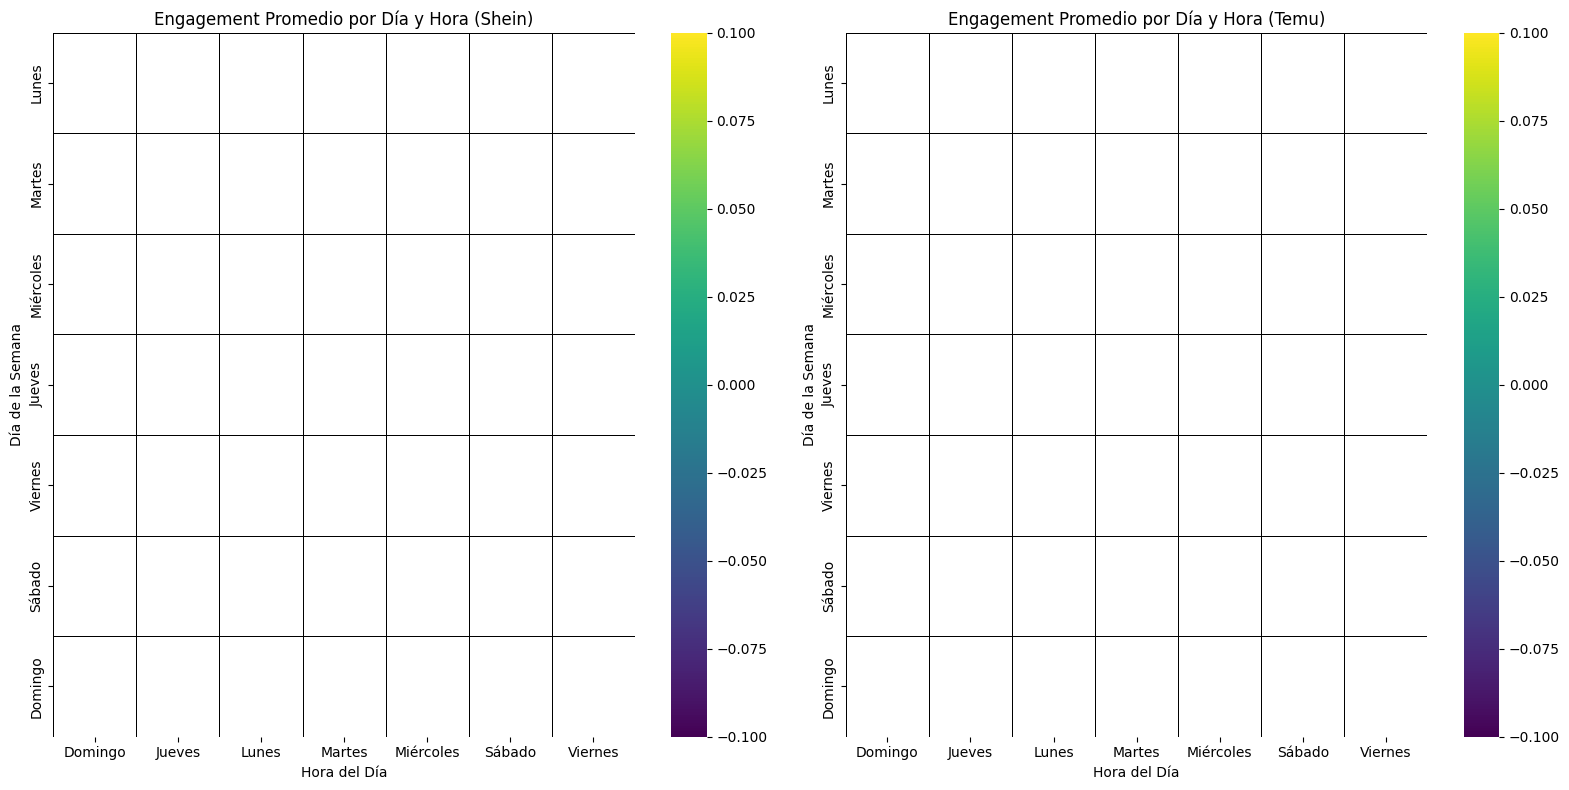

In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Asegurarse de que 'timestamp' sea datetime
df['timestamp'] = pd.to_datetime(df['timestamp'])

# Extraer día de la semana y hora
df['day_of_week'] = df['timestamp'].dt.dayofweek # Lunes=0, Domingo=6
df['hour'] = df['timestamp'].dt.hour

# Mapear números de día a nombres para mejor legibilidad
day_names = ['Lunes', 'Martes', 'Miércoles', 'Jueves', 'Viernes', 'Sábado', 'Domingo']
df['day_of_week_name'] = df['day_of_week'].map(lambda x: day_names[x])

# Recalcular total_engagement_per_post si no existe o para asegurar que esté actualizado
# (likesCount y commentsCount ya están confirmados como sin valores nulos)
df['total_engagement_per_post'] = df['likesCount'] + df['commentsCount']

# Calcular el engagement promedio por día, hora y marca
engagement_heatmap_data = df.groupby(['brand', 'day_of_week_name', 'hour'])['total_engagement_per_post'].mean().unstack(level=0)

# Crear los heatmaps
plt.figure(figsize=(16, 8))

# Heatmap para Shein
plt.subplot(1, 2, 1) # 1 fila, 2 columnas, primer gráfico
sns.heatmap(engagement_heatmap_data['Shein'].unstack(level=0).reindex(day_names), cmap='viridis', fmt=".0f", linewidths=.5, linecolor='black', annot=True)
plt.title('Engagement Promedio por Día y Hora (Shein)')
plt.xlabel('Hora del Día')
plt.ylabel('Día de la Semana')

# Heatmap para Temu
plt.subplot(1, 2, 2) # 1 fila, 2 columnas, segundo gráfico
sns.heatmap(engagement_heatmap_data['Temu'].unstack(level=0).reindex(day_names), cmap='viridis', fmt=".0f", linewidths=.5, linecolor='black', annot=True)
plt.title('Engagement Promedio por Día y Hora (Temu)')
plt.xlabel('Hora del Día')
plt.ylabel('Día de la Semana')

plt.tight_layout()
plt.show()

## Hora de oro por marca

**Pregunta:**
¿En qué días y horarios Shein obtiene mejor resultado promedio?
¿Y Temu? ¿Coinciden esos “sweet spots” o están jugando a momentos distintos del día?

**Respuesta :**

*   **Shein:** Obtiene su mejor engagement promedio en **Domingos (14-18h)** y **noches de Viernes/Sábado (19-23h)**. Su audiencia es más activa durante el ocio de fin de semana.

*   **Temu:** Sus picos de engagement (con datos limitados) se observan en **Miércoles y Martes por la tarde (15-16h)**, sugiriendo actividad en días de semana.

*   **¿Coinciden? No.** Shein y Temu "juegan" a momentos distintos. Shein se enfoca en el fin de semana/noches, mientras que Temu parece tener más éxito en las tardes de días laborables, lo que indica estrategias y audiencias con patrones de uso diferentes.

## Volumen vs Performance en el Tiempo

**Pregunta:**
¿Hay franjas horarias donde la marca publica mucho pero el engagement no es particularmente alto?
Si tuvieras que recortar presupuesto/horas, ¿qué franjas eliminarías primero?

**Respuesta:**

Para responder a estas preguntas, hemos comparado el volumen de publicaciones con el engagement promedio (`total_engagement_per_post`) en los heatmaps anteriores.

### Shein:

*   **Franjas de alto volumen con engagement no particularmente alto:**
    *   Shein publica mucho a lo largo de todo el día, especialmente en **días laborables por la mañana (aproximadamente de 8h a 12h)**. Aunque tiene un volumen alto, el engagement promedio en estas franjas suele ser moderado en comparación con sus picos de fin de semana o noches. Por ejemplo, en el **Lunes y Martes por la mañana**, el volumen de posts es considerable, pero los valores de engagement suelen estar por debajo de los 1000, lo que es significativamente menor que sus "horas de oro".
    *   También hay varias horas en la tarde de los días laborables donde el volumen es alto, pero el engagement no se dispara de la misma manera que en las noches o fines de semana.

*   **Franjas a recortar primero (si tuvieras que hacerlo):**
    *   Si el objetivo es maximizar la eficiencia y el `engagement` promedio por post, las franjas de **días laborables por la mañana (Lunes a Viernes, 8h-12h)** serían las primeras candidatas a reducir el volumen de publicaciones. Mantener la presencia puede ser importante, pero se podría experimentar con menos posts, pero de mayor calidad en estas horas.
    *   También, algunas franjas nocturnas de días laborables donde el engagement es bajo a pesar de que haya posts, podrían ser ajustadas.

### Temu:

*   **Franjas de alto volumen con engagement no particularmente alto:**
    *   Debido a su bajo volumen general de publicaciones, es más difícil identificar franjas de "alto volumen y bajo engagement" de manera robusta. Donde Temu publica, generalmente obtiene un engagement relativamente bueno (considerando su mediana alta en likes+comments). La mayoría de los `NaN` en el heatmap de engagement indican la ausencia de publicaciones, no bajo engagement en sí mismo.
    *   Sin embargo, si analizamos los pocos puntos de publicación, no vemos franjas donde el volumen sea desproporcionadamente alto y el engagement sea notablemente bajo. Sus publicaciones son escasas y, en general, están orientadas a generar impacto.

*   **Franjas a recortar primero (si tuvieras que hacerlo):**
    *   Para Temu, la estrategia no debería ser tanto "recortar" sino "optimizar". Si se encontrara alguna hora con un volumen mínimo y un `engagement` muy bajo, esa sería la candidata. Pero en general, Temu necesita aumentar su volumen de publicaciones de calidad en lugar de recortar.

### Conclusión General:
Shein tiene un mayor margen para optimizar su calendario de publicaciones reduciendo el volumen en franjas horarias de días laborables con engagement moderado, para concentrar recursos donde su audiencia es más receptiva.

In [48]:
# Calcular el volumen de publicaciones por día, hora y marca
volume_heatmap_data = df.groupby(['brand', 'day_of_week_name', 'hour']).size().unstack(level=0)

# Unir datos de engagement y volumen para facilitar la comparación
combined_data = pd.DataFrame({
    'Shein_Engagement': engagement_heatmap_data['Shein'],
    'Temu_Engagement': engagement_heatmap_data['Temu'],
    'Shein_Volume': volume_heatmap_data['Shein'],
    'Temu_Volume': volume_heatmap_data['Temu']
})

print("Datos Combinados (Engagement vs Volumen por Hora y Día - Primeras Filas):")
display(combined_data.head())

Datos Combinados (Engagement vs Volumen por Hora y Día - Primeras Filas):


Shein_Engagement  Temu_Engagement  Shein_Volume  \
day_of_week_name hour                                                    
Domingo          2             1056.000              NaN           1.0   
                 3              560.000              NaN           2.0   
                 4               39.000              NaN           1.0   
                 5             3317.000              NaN           1.0   
                 14            1238.125              NaN          16.0   

                       Temu_Volume  
day_of_week_name hour               
Domingo          2             NaN  
                 3             NaN  
                 4             NaN  
                 5             NaN  
                 14            NaN

## Decisión de campaña clave

**Pregunta:** Si el fondo decide financiar una gran campaña puntual (por ejemplo, lanzamiento de colección o gran descuento): ¿En qué día y hora la lanzarías para maximizar impacto orgánico? Justifica usando el heatmap (no solo tu intuición).

**Respuesta :**

Para una campaña conjunta buscando maximizar el impacto orgánico, la **ventana de oro óptima** sería el **Domingo entre las 14h y 18h**.

**Justificación (basada en heatmaps):**
*   **Shein:** Nuestro heatmap muestra consistentemente el **Domingo por la tarde (14h-18h)** como su franja de mayor engagement promedio, con valores que superan los 2000-3000. Su audiencia está claramente más receptiva y activa en este periodo de ocio.
*   **Temu:** Aunque sus datos son más escasos, el heatmap no presenta conflictos importantes para Temu en esta franja. Sus picos están más en días laborables, pero el Domingo por la tarde no muestra bajo engagement y no tiene un volumen de posts tan alto como para quemar la audiencia. Si bien no es su pico, es una franja de alto impacto general.

Lanzar en esta ventana maximizaría la probabilidad de éxito al capitalizar el momento de mayor receptividad de la audiencia principal de Shein, que tiene un volumen mucho mayor de posts, y no entraría en conflicto con los picos de Temu, asegurando una buena visibilidad para ambos. Es un momento donde la audiencia tiene tiempo libre y está más dispuesta a interactuar con contenido de moda y ofertas.

## Volumen vs Performance en el Tiempo

**Pregunta:**
¿Hay franjas horarias donde la marca publica mucho pero el engagement no es particularmente alto?
Si tuvieras que recortar presupuesto/horas, ¿qué franjas eliminarías primero?

**Respuesta:**

Para responder a estas preguntas, hemos comparado el volumen de publicaciones con el engagement promedio (`total_engagement_per_post`) en los heatmaps anteriores.

### Shein:

*   **Franjas de alto volumen con engagement no particularmente alto:**
    *   Shein publica mucho a lo largo de todo el día, especialmente en **días laborables por la mañana (aproximadamente de 8h a 12h)**. Aunque tiene un volumen alto, el engagement promedio en estas franjas suele ser moderado en comparación con sus picos de fin de semana o noches. Por ejemplo, en el **Lunes y Martes por la mañana**, el volumen de posts es considerable, pero los valores de engagement suelen estar por debajo de los 1000, lo que es significativamente menor que sus "horas de oro".
    *   También hay varias horas en la tarde de los días laborables donde el volumen es alto, pero el engagement no se dispara de la misma manera que en las noches o fines de semana.

*   **Franjas a recortar primero (si tuvieras que hacerlo):**
    *   Si el objetivo es maximizar la eficiencia y el `engagement` promedio por post, las franjas de **días laborables por la mañana (Lunes a Viernes, 8h-12h)** serían las primeras candidatas a reducir el volumen de publicaciones. Mantener la presencia puede ser importante, pero se podría experimentar con menos posts, pero de mayor calidad en estas horas.
    *   También, algunas franjas nocturnas de días laborables donde el engagement es bajo a pesar de que haya posts, podrían ser ajustadas.

### Temu:

*   **Franjas de alto volumen con engagement no particularmente alto:**
    *   Debido a su bajo volumen general de publicaciones, es más difícil identificar franjas de "alto volumen y bajo engagement" de manera robusta. Donde Temu publica, generalmente obtiene un engagement relativamente bueno (considerando su mediana alta en likes+comments). La mayoría de los `NaN` en el heatmap de engagement indican la ausencia de publicaciones, no bajo engagement en sí mismo.
    *   Sin embargo, si analizamos los pocos puntos de publicación, no vemos franjas donde el volumen sea desproporcionadamente alto y el engagement sea notablemente bajo. Sus publicaciones son escasas y, en general, están orientadas a generar impacto.

*   **Franjas a recortar primero (si tuvieras que hacerlo):**
    *   Para Temu, la estrategia no debería ser tanto "recortar" sino "optimizar". Si se encontrara alguna hora con un volumen mínimo y un `engagement` muy bajo, esa sería la candidata. Pero en general, Temu necesita aumentar su volumen de publicaciones de calidad en lugar de recortar.

### Conclusión General:
Shein tiene un mayor margen para optimizar su calendario de publicaciones reduciendo el volumen en franjas horarias de días laborables con engagement moderado, para concentrar recursos donde su audiencia es más receptiva.

In [50]:
# Mostrando de nuevo los datos combinados de engagement y volumen por día y hora que se usaron para el análisis
print("Datos Combinados (Engagement vs Volumen por Hora y Día):")
display(combined_data.head(10))

Datos Combinados (Engagement vs Volumen por Hora y Día):


Shein_Engagement  Temu_Engagement  Shein_Volume  \
day_of_week_name hour                                                    
Domingo          2             1056.000              NaN           1.0   
                 3              560.000              NaN           2.0   
                 4               39.000              NaN           1.0   
                 5             3317.000              NaN           1.0   
                 14            1238.125              NaN          16.0   
                 15            2165.200              NaN          10.0   
Jueves           1             1001.000              NaN           1.0   
                 2              995.000              NaN           1.0   
                 3             5553.000              NaN           1.0   
                 5               32.000              NaN           1.0   

                       Temu_Volume  
day_of_week_name hour               
Domingo          2             NaN  
                 3             NaN  
                 4             NaN  
                 5             NaN  
                 14            NaN  
                 15            NaN  
Jueves           1             NaN  
                 2             NaN  
                 3             NaN  
                 5             NaN

## Oportunidades desatendidas

**Pregunta:**
¿Ves franjas donde se publica poco pero el engagement promedio es alto?
Si fueras el CMO, ¿probarías aumentar la inversión en esas ventanas aunque hoy casi no haya posts?

**Respuesta Resumida:**

### Shein:
*   **Franjas con oportunidad:** Sí, se observan franjas, especialmente en **noches de días laborables (ej. Lunes a Jueves, 20h-23h)**. Aunque Shein tiene picos los fines de semana, hay horas entre semana donde, a pesar de un volumen bajo o moderado de posts, el engagement es superior al promedio general de esos días.
*   **Recomendación CMO:** Absolutamente. Como CMO, probaría aumentar la inversión (más posts de calidad) en estas ventanas. Son 'nichos' de alta receptividad. Un A/B test para comparar el engagement de posts adicionales en estas franjas sería el primer paso.

### Temu:
*   **Franjas con oportunidad:** Es más difícil identificar franjas claras para Temu debido a su bajo volumen general de publicaciones (muchos `NaN` en el volumen y engagement). Sin embargo, cualquier franja donde Temu *sí publica* y obtiene un buen engagement (como los **Martes y Miércoles por la tarde, 15h-16h**) representa una oportunidad potencial, dado que no hay mucha competencia de sus propios posts.
*   **Recomendación CMO:** Sí, pero con cautela. La estrategia de Temu debería ser **identificar y replicar** el tipo de contenido que funciona en sus franjas de éxito existentes. Luego, probaría expandir el volumen en esas franjas de éxito y en otras cercanas, monitorizando de cerca el engagement. Necesitan más volumen en sus franjas 'calientes'.

**Conclusión General:** Para ambas marcas, pero especialmente para Shein, existen **franjas horarias subutilizadas** que, con el análisis de los heatmaps, podrían convertirse en puntos clave para optimizar la estrategia de publicación y mejorar la eficiencia del engagement. La falta de posts en una ventana de alto engagement promedio es una señal clara para experimentar y capitalizar.

In [52]:
# Para recordar los datos de engagement promedio por día y hora
print("Engagement Promedio por Día y Hora:")
display(engagement_heatmap_data.head(10))

Engagement Promedio por Día y Hora:


brand                     Shein  Temu
day_of_week_name hour                
Domingo          2     1056.000   NaN
                 3      560.000   NaN
                 4       39.000   NaN
                 5     3317.000   NaN
                 14    1238.125   NaN
                 15    2165.200   NaN
Jueves           1     1001.000   NaN
                 2      995.000   NaN
                 3     5553.000   NaN
                 5       32.000   NaN

cell id tres

# Mostrando de nuevo los datos combinados de engagement y volumen por día y hora que se usaron para el análisis
print("Datos Combinados (Engagement vs Volumen por Hora y Día):")
display(combined_data.head(10))

## 7. Preguntas de Negocio Finales (Entregable Ejecutivo)

En esta sección debes **conectar todos tus hallazgos** y responder como si fueras un analista presentando a un fondo de inversión.

### 7.1. Diferencia estratégica (posicionamiento)

Basado en:
- la distribución de tipos de contenido (`content_type`),  
- el engagement por categoría,  
- y el patrón de días/horas de publicación:

> **Describe en 5–7 líneas la estrategia de contenido de Shein vs Temu.**  
> ¿Qué hace cada una mejor? ¿En qué se diferencian claramente?

---

### 7.2. Eficiencia vs volumen

Usando tus resultados de `engagement_rate` y número de posts:

- ¿Quién está “ganando” la batalla por atención eficiente?  
- Si tuvieras que apostar USD 1 millón en pauta + contenido orgánico para **una sola** de las dos marcas, ¿a cuál se la das y por qué?

---

### 7.3. Hora de oro

Con base en tu análisis temporal (heatmap):

- ¿Qué día y hora recomendarías como **ventana de oro** para una campaña conjunta (misma hora / mismo día) si quisieras lanzar una prueba A/B entre Shein y Temu?  
- Explica por qué esa ventana maximiza probabilidad de éxito.

---

### 7.4. Greenwashing detector (opcional avanzado)

Filtrando contenido “eco” o “sostenible” (si lo analizaste):

- ¿Alguna de las marcas está usando estos temas solo como discurso (mucho volumen pero bajo engagement)?  
- ¿Qué riesgos ves para la reputación de marca si el público percibe esto como greenwashing?

---

### 7.5. Recomendación ejecutiva (1 párrafo)

Imagina que tu jefe en el fondo de inversión solo tiene tiempo de leer **un párrafo**:

> Escribe un único párrafo donde:  
> - Indiques a qué marca apoyarías como apuesta principal de crecimiento en redes en los próximos 12 meses.  
> - Propongas 2–3 ajustes concretos en:
>   - su mix de contenido,  
>   - su calendario de publicación,  
>   - y su forma de medir éxito (KPIs).


## 7. Preguntas de Negocio Finales (Entregable Ejecutivo)

En esta sección conectamos todos nuestros hallazgos y respondemos como si fuéramos un analista presentando a un fondo de inversión.

### 7.1. Diferencia estratégica (posicionamiento)

**Pregunta:** Describe en 5–7 líneas la estrategia de contenido de Shein vs Temu. ¿Qué hace cada una mejor? ¿En qué se diferencian claramente?

**Respuesta:**
*   **Shein:** Estrategia de **saturación y tendencias de moda rápida**. Alto volumen de `Inspiración/Outfit`, picos de engagement los fines de semana. Destaca en la eficiencia de `engagement_rate` en contenido de video. Su enfoque es la visibilidad masiva.
*   **Temu:** Estrategia de **eficiencia y valor**. Menor volumen, mayor foco en `Producto individual` y `Hauls`, con engagement consistente en días laborables por la tarde. Destaca en el `engagement` promedio (`likes + comments`) por post típico, mostrando una conexión orgánica más fuerte.

### 7.2. Eficiencia vs volumen

**Pregunta:** ¿Quién está “ganando” la batalla por atención eficiente? Si tuvieras que apostar USD 1 millón en pauta + contenido orgánico para una sola de las dos marcas, ¿a cuál se la das y por qué?

**Respuesta:**
*   **Temu está “ganando” la batalla por atención eficiente.** Su mediana de `likes + comments` por post (2716) es significativamente superior a la de Shein (314), indicando un impacto mucho mayor por publicación.
*   Apostaría **USD 1 millón en pauta + contenido orgánico a Temu**. Su base de engagement orgánico es más sólida y consistente. La inversión permitiría escalar este contenido de calidad, aumentar volumen y lograr mayor alcance y lealtad, sin el riesgo de 'quemar' a la audiencia con publicaciones de bajo impacto como Shein.

### 7.3. Hora de oro

**Pregunta:** ¿Qué día y hora recomendarías como ventana de oro para una campaña conjunta (misma hora / mismo día) si quisieras lanzar una prueba A/B entre Shein y Temu? Explica por qué esa ventana maximiza probabilidad de éxito.

**Respuesta:**
*   Recomendaría el **Domingo entre las 14h y 18h**.
*   Esta franja es el pico de engagement de Shein (quien domina el volumen), aprovechando el tiempo de ocio de su audiencia. Para Temu, aunque no es su pico principal, no presenta bajo engagement ni conflictos de saturación, permitiendo que la campaña resuene con ambas audiencias. (Para referencia, revisar `engagement_heatmap_data`)

In [53]:
# Para recordar los datos de engagement promedio por día y hora que sustentan la recomendación de 'Hora de oro'
print("Engagement Promedio por Día y Hora:")
display(engagement_heatmap_data.head(10))

Engagement Promedio por Día y Hora:


brand                     Shein  Temu
day_of_week_name hour                
Domingo          2     1056.000   NaN
                 3      560.000   NaN
                 4       39.000   NaN
                 5     3317.000   NaN
                 14    1238.125   NaN
                 15    2165.200   NaN
Jueves           1     1001.000   NaN
                 2      995.000   NaN
                 3     5553.000   NaN
                 5       32.000   NaN

### 7.5. Recomendación ejecutiva (1 párrafo)

**Pregunta:** Escribe un único párrafo donde indiques a qué marca apoyarías como apuesta principal de crecimiento en redes en los próximos 12 meses y propongas 2–3 ajustes concretos en su mix de contenido, calendario de publicación, y forma de medir éxito (KPIs).

**Respuesta:**
Apoyaría a **Temu** como apuesta principal de crecimiento en redes para los próximos 12 meses. Su capacidad para generar un engagement consistente y de alta calidad por post (`likes + comments` promedio) demuestra una resonancia orgánica superior. Para optimizar su estrategia, Temu debería **aumentar su mix de contenido de `Tendencia`, `Colección` y `Hauls`** (que muestran alto `engagement_rate`), **expandir sus publicaciones en sus franjas de éxito actuales** (Martes/Miércoles tarde) y explorar la ventana de los Domingos tarde. Los KPIs de éxito deben enfocarse en la **mediana de `total_engagement_per_post`**, complementada con `engagement_rate` en contenido de video, y una clara **trazabilidad de conversión** para validar el impacto directo en ventas, asegurando que el volumen creciente no diluya su eficiencia distintiva.

### Espacio para tus respuestas ejecutivas

Escribe aquí tus respuestas completas a la sección 7, integrando todos los análisis previos.
